### Loading Packages
Let us load the packages needed for visualization and exploratory analysis


In [40]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")

In [41]:
df = pd.read_csv("nyc_taxi_trip_duration.csv")

In [42]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [43]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [44]:
df.iloc[1,:]

id                              id0889885
vendor_id                               1
pickup_datetime       2016-03-11 23:35:37
dropoff_datetime      2016-03-11 23:53:57
passenger_count                         2
pickup_longitude                 -73.9883
pickup_latitude                   40.7317
dropoff_longitude                -73.9948
dropoff_latitude                  40.6949
store_and_fwd_flag                      N
trip_duration                        1100
Name: 1, dtype: object

In [48]:
import math
 
lat1 = df['pickup_latitude'].map(radians)
lon1 = df['pickup_longitude'].map(radians)
lat2 = df['dropoff_latitude'].map(radians)
lon2 = df['dropoff_longitude'].map(radians)


df['longitudes']= lon2-lon1
df['latitudes']= lat2-lat1  

R = 6371.01
 
df['distance'] = R * np.arccos(np.sin(start_lat) * np.sin(df['latitudes']) + np.cos(start_lat) * np.cos(df['latitudes']) * np.cos(start_lon - df['longitudes']))
df
  

NameError: name 'radians' is not defined

In [33]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [ ]:
df['trip_duration'].describe()

In [ ]:
sns.boxplot(np.log(df['distance']), orient='verticle')

# Target Exploration

In [38]:
temp= np.log(df['distance'])

sns.distplot(temp)

KeyError: 'distance'

In [ ]:
a = sns.catplot(y='trip_duration', kind='count', data=df, height=2.6, aspect=2.5, orient='h')

In [ ]:
df['trip_duration'].value_counts(normalize = True)

In [ ]:
df.dtypes

In [ ]:
sns.distplot(df['distance'], kde= False)


In [ ]:
temp1=np.log(df['distance'] + 6000)
sns.distplot(temp1, kde= False, bins=100)



# Bivariate Analysis

KeyError: 'distance'

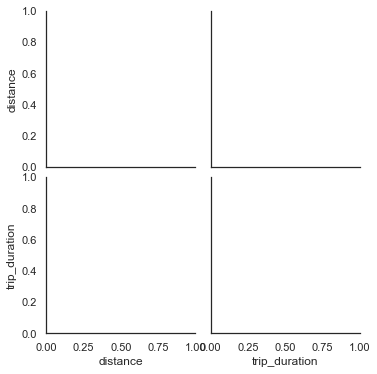

In [46]:
cols=['distance','trip_duration']
sns.pairplot(df,vars=cols,plot_kws={'alpha':0.1})
plt.show()
    

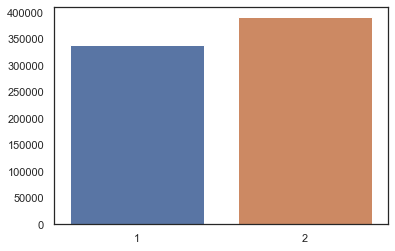

In [7]:
a=df['vendor_id'].value_counts() 
sns.barplot(a.index, a.values)

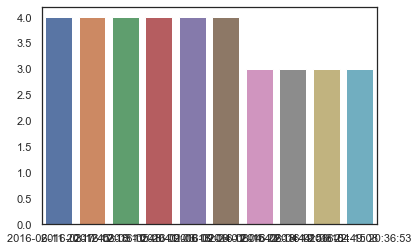

In [8]:
a=df['pickup_datetime'].value_counts().head(10) 
sns.barplot(a.index, a.values)

# Categorical features
store_and_fwd_flag
vendor_id

In [10]:
cat_cols=['store_and_fwd_flag','vendor_id']

for i in range(0,len(cat_cols)):
    print(str(cat_cols[i]) + " - Number of Unique Values: " + str(df[cat_cols[i]].nunique()))

store_and_fwd_flag - Number of Unique Values: 2
vendor_id - Number of Unique Values: 2


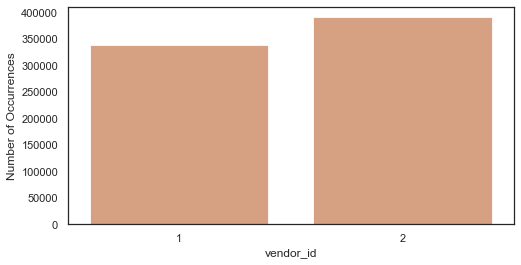

In [11]:
color = sns.color_palette()

int_level = df['vendor_id'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('vendor_id', fontsize=12)
plt.show()

# Bivariate Analysis

In [12]:
def barplot_percentages(feature):
    #fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
    ax1 = df.groupby(feature)['trip_duration'].value_counts(normalize=True).unstack()
    ax1.plot(kind='bar', stacked='True')
    int_level = df[feature].value_counts()

    plt.figure(figsize=(8,4))
    sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(str(feature), fontsize=12)
    plt.show()

ValueError: Image size of 374x97656 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

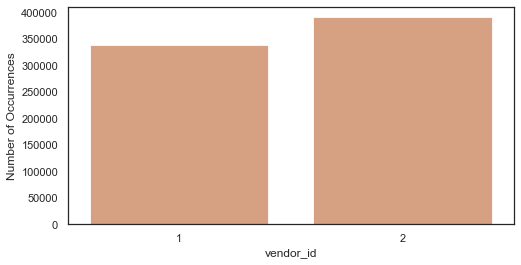

In [13]:
barplot_percentages("vendor_id")

In [23]:
df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

In [35]:
sns.lineplot(df['distance'],df['trip_duration'])

KeyError: 'distance'

In [36]:
df['distance']

KeyError: 'distance'

In [34]:
sns.lineplot(x="distance", y="trip_duration", data=df)

ValueError: Could not interpret input 'distance'